<div align="center" style="font-family: 'Consolas', monospace;"><h1> Model Evaluation For Alzheimer's Classifier </h1> </div>

<p align = "center" style="font-family: 'Consolas', monospace;"> The purpose of this notebook is to evaluate and compare model performance for the best model trained in model training notebook</p>

<ul><li><p style = "font-family: consolas"> Importing important libraries</p></li></ul>

In [7]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc

model = joblib.load('models/model.pkl')
df = pd.read_csv('data/test_data.csv') # Test Data

# Features & target
y = df['Alzheimer’s Diagnosis']
X = df.drop(columns=['Alzheimer’s Diagnosis'])

y_pred = model.predict(X) # Predictions

<ul><li><p style = "font-family: consolas"> Evaluate Model</p></li></ul>

In [8]:
def evaluate_model(y_true, y_pred):
    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model(y, y_pred)

Model Evaluation Metrics:
Accuracy: 0.7144
Precision: 0.7115
Recall: 0.7144
F1 Score: 0.7114

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      8719
           1       0.67      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



<ul><li><p style = "font-family: consolas"> Confusion Matrix</p></li></ul>

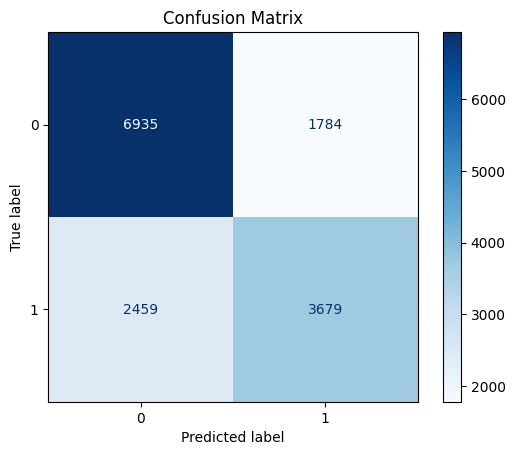

In [9]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

<ul><li><p style = "font-family: consolas"> Precision-Recall Curve</p></li></ul>

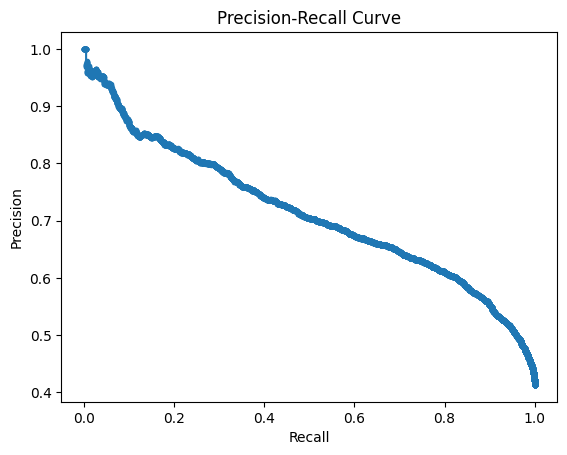

In [10]:
precision, recall, _ = precision_recall_curve(y, model.decision_function(X))

plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


<ul><li><p style = "font-family: consolas"> ROC Curve</p></li></ul>

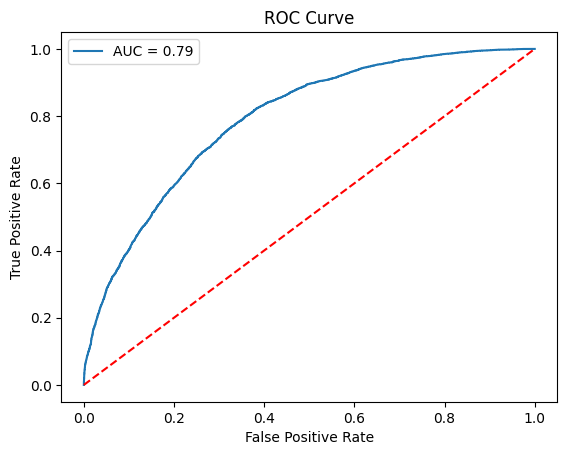

In [ ]:
fpr, tpr, _ = roc_curve(y, model.decision_function(X))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "--", color="red")  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
